# Term Project - Wine Quality

Mean Quality for Red Wine: 5.6360225140712945
Mean Quality for White Wine: 5.87790935075541


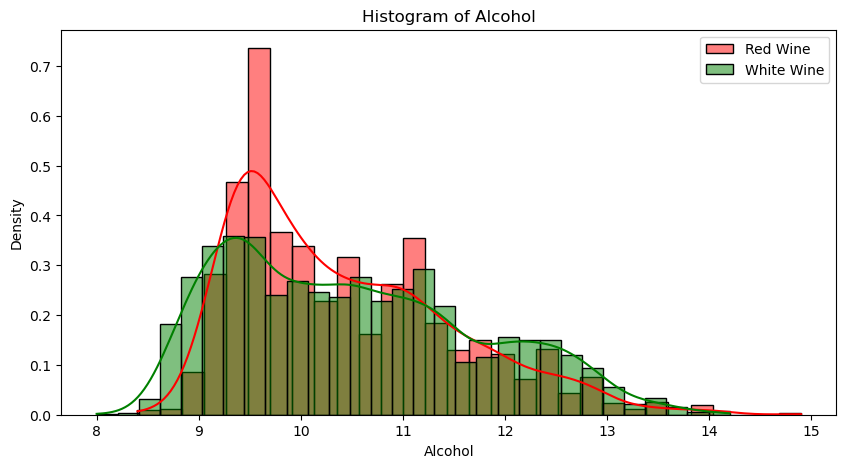


Red Wine - Alcohol Statistics:
Mean: 10.423
Median: 10.200
Mode(s): [9.5]
Standard Deviation: 1.066
Variance: 1.136
Range: 6.500
Skewness: 0.861
Number of Outliers: 13
Outliers: [14.         14.         14.         14.         14.9        14.
 13.6        13.6        13.6        14.         14.         13.56666667
 13.6       ]

White Wine - Alcohol Statistics:
Mean: 10.514
Median: 10.400
Mode(s): [9.4]
Standard Deviation: 1.231
Variance: 1.514
Range: 6.200
Skewness: 0.487
Number of Outliers: 0
Outliers: []

Cohen's d for Alcohol (Red vs. White): -0.077


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from ucimlrepo import fetch_ucirepo 

# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

# Combine 'features' and 'targets' DataFrames
complete_df = pd.concat([wine_quality['data']['features'], wine_quality['data']['targets']], axis=1)

# Add 'color' column manually
num_red_wines = 1599  # Number of red wines in the dataset
complete_df['color'] = ['red'] * num_red_wines + ['white'] * (len(complete_df) - num_red_wines)

# Separate the data based on wine color
red_wine = complete_df[complete_df['color'] == 'red']
white_wine = complete_df[complete_df['color'] == 'white']

# Calculate the mean quality for each color
mean_quality_red = red_wine['quality'].mean()
mean_quality_white = white_wine['quality'].mean()

print(f"Mean Quality for Red Wine: {mean_quality_red}")
print(f"Mean Quality for White Wine: {mean_quality_white}")


# Load and prepare the data
complete_df = pd.concat([wine_quality['data']['features'], wine_quality['data']['targets']], axis=1)
num_red_wines = 1599
complete_df['color'] = ['red'] * num_red_wines + ['white'] * (len(complete_df) - num_red_wines)

# Function to analyze a variable
def analyze_variable(variable_name):
    # Separate data by color
    red_wine = complete_df[complete_df['color'] == 'red']
    white_wine = complete_df[complete_df['color'] == 'white']
    
    # Plot histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(red_wine[variable_name], color='red', label='Red Wine', kde=True, stat="density", bins=30)
    sns.histplot(white_wine[variable_name], color='green', label='White Wine', kde=True, stat="density", bins=30)
    plt.title(f'Histogram of {variable_name.capitalize()}')
    plt.xlabel(variable_name.capitalize())
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Calculate descriptive statistics
    for color, wine_df in [('Red', red_wine), ('White', white_wine)]:
        mean_val = wine_df[variable_name].mean()
        median_val = wine_df[variable_name].median()
        mode_val = wine_df[variable_name].mode().tolist()
        std_val = wine_df[variable_name].std()
        variance_val = wine_df[variable_name].var()
        range_val = wine_df[variable_name].max() - wine_df[variable_name].min()
        skewness = wine_df[variable_name].skew()
        
        # Identify outliers using IQR
        Q1 = wine_df[variable_name].quantile(0.25)
        Q3 = wine_df[variable_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = wine_df[(wine_df[variable_name] < lower_bound) | (wine_df[variable_name] > upper_bound)][variable_name]

        print(f'\n{color} Wine - {variable_name.capitalize()} Statistics:')
        print(f'Mean: {mean_val:.3f}')
        print(f'Median: {median_val:.3f}')
        print(f'Mode(s): {mode_val}')
        print(f'Standard Deviation: {std_val:.3f}')
        print(f'Variance: {variance_val:.3f}')
        print(f'Range: {range_val:.3f}')
        print(f'Skewness: {skewness:.3f}')
        print(f'Number of Outliers: {len(outliers)}')
        print(f'Outliers: {outliers.values}')

    # Calculate Cohen's d for effect size between red and white wines
    red_data = red_wine[variable_name]
    white_data = white_wine[variable_name]
    n1 = len(red_data)
    n2 = len(white_data)
    var1 = red_data.var()
    var2 = white_data.var()

    # Updated pooled standard deviation
    pooled_std = np.sqrt((n1 * var1 + n2 * var2) / (n1 + n2))
    cohen_d = (red_data.mean() - white_data.mean()) / pooled_std
    
    print(f"\nCohen's d for {variable_name.capitalize()} (Red vs. White): {cohen_d:.3f}")

# Analyzing the 'alcohol' variable
analyze_variable('alcohol')


A Cohen's d of -0.077 is very close to 0 and shows a very small effect size between red and white wines in terms of their alcohol content. The negative sign tells us the direction of the differencce. So on average, the alcohol content of red wine is slightly lower than white wine.  

Outliers: Alcohol content in wines generally are between 8-15%, while some varieties could be higher. If any values are significantly over 15%, they could be indicating a potential error, or a unique type of wine. Anything below 8% are unusual but not necessarily errors. To this end, I would keep values within 8-15% but remove values over 15%.


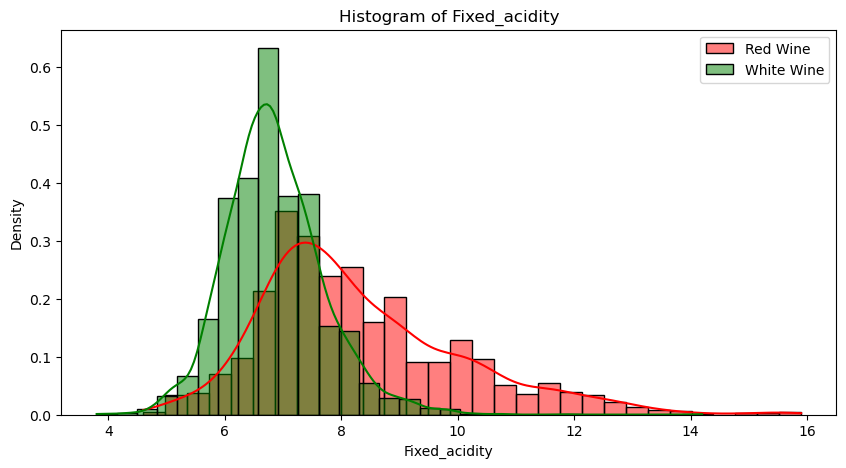


Red Wine - Fixed_acidity Statistics:
Mean: 8.320
Median: 7.900
Mode(s): [7.2]
Standard Deviation: 1.741
Variance: 3.031
Range: 11.300
Skewness: 0.983
Number of Outliers: 49
Outliers: [12.8 12.8 15.  15.  12.5 13.3 13.4 12.4 12.5 13.8 13.5 12.6 12.5 12.8
 12.8 14.  13.7 13.7 12.7 12.5 12.8 12.6 15.6 12.5 13.  12.5 13.3 12.4
 12.5 12.9 14.3 12.4 15.5 15.5 15.6 13.  12.7 13.  12.7 12.4 12.7 13.2
 13.2 13.2 15.9 13.3 12.9 12.6 12.6]

White Wine - Fixed_acidity Statistics:
Mean: 6.855
Median: 6.800
Mode(s): [6.8]
Standard Deviation: 0.844
Variance: 0.712
Range: 10.400
Skewness: 0.648
Number of Outliers: 119
Outliers: [ 9.8  9.8 10.2  9.1 10.   9.2  9.2  9.   9.1  9.2 10.3  9.4  9.2  9.8
  9.6  9.2  9.   9.3  9.2  9.1  8.9  9.8  8.9  9.2  9.7  9.4 10.3  9.6
  9.   9.7  9.2  9.4  9.6  9.2  9.   9.2 10.7 10.7  9.   9.2  9.8  9.2
 14.2  8.9  8.9  9.1  9.1  9.8  9.   9.3  8.9  9.   9.   8.9  9.   9.3
  9.2  9.6  9.4  9.4 10.   8.9  8.9 10.   9.2  9.2  9.2  9.9  9.5  9.
  9.   8.9  9.5 11.8  9.4

In [32]:
# Analyze other variables in the same way:

# Analyzing the 'fixed acidity' variable
analyze_variable('fixed_acidity')

High outliers of fixed acidity for both red and white wines could represent certain wine-making techniques or grape varieties that lead to unusually high acidity. However, extremely low values (like 3.8) are uncommon and may be considered data entry errors and should be examined closer.   

Cohen's d of 1.293 indicates a significant difference in fixed acidity between red and white wines, supporting the idea that red wines have higher acidity levels than white wines.

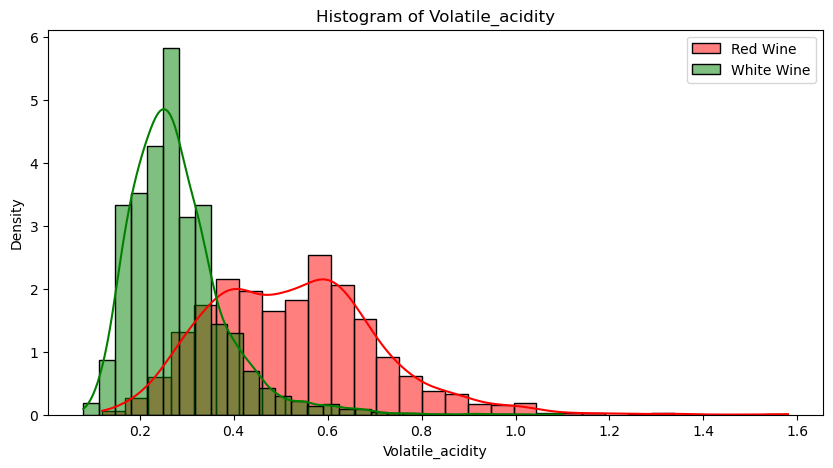


Red Wine - Volatile_acidity Statistics:
Mean: 0.528
Median: 0.520
Mode(s): [0.6]
Standard Deviation: 0.179
Variance: 0.032
Range: 1.460
Skewness: 0.672
Number of Outliers: 19
Outliers: [1.13  1.02  1.07  1.33  1.33  1.04  1.09  1.04  1.24  1.185 1.02  1.035
 1.025 1.115 1.02  1.02  1.58  1.18  1.04 ]

White Wine - Volatile_acidity Statistics:
Mean: 0.278
Median: 0.260
Mode(s): [0.28]
Standard Deviation: 0.101
Variance: 0.010
Range: 1.020
Skewness: 1.577
Number of Outliers: 186
Outliers: [0.66  0.66  0.67  0.54  0.595 0.67  0.53  0.54  0.57  0.685 0.495 0.64
 0.52  0.58  0.585 0.59  0.6   0.58  0.59  0.55  0.905 0.55  0.49  0.55
 0.52  0.6   0.55  0.51  0.62  0.51  0.56  0.57  0.67  0.5   0.56  0.56
 0.655 0.595 0.705 0.52  0.55  0.6   0.64  0.68  0.49  0.51  0.55  0.52
 0.5   0.55  0.6   0.61  0.61  0.61  0.66  0.57  0.5   0.5   0.59  0.58
 0.54  0.58  0.57  0.64  0.56  0.49  0.49  0.67  0.55  0.56  0.52  0.52
 0.85  0.51  0.62  0.51  0.53  0.64  0.55  0.49  0.49  0.61  0.545 0.62
 0.

In [34]:
# Analyzing the 'volatile acidity' variable
analyze_variable('volatile_acidity')


When it comes to volatile acidity, we should consider removing values higher than 1.2 for red wines and 1.1 for white wines since they are unrealistic based on typical wine characteristics. However, moderate outliers (1 for red wines and 0.7 for white wines) should be retained since they could offer insights into variations in quality or taste.    
Similar to fixed acidity, the effect size of volatile acidity is very large, suggesting that red wines have substantially higher volatile acidity compared to white wines.

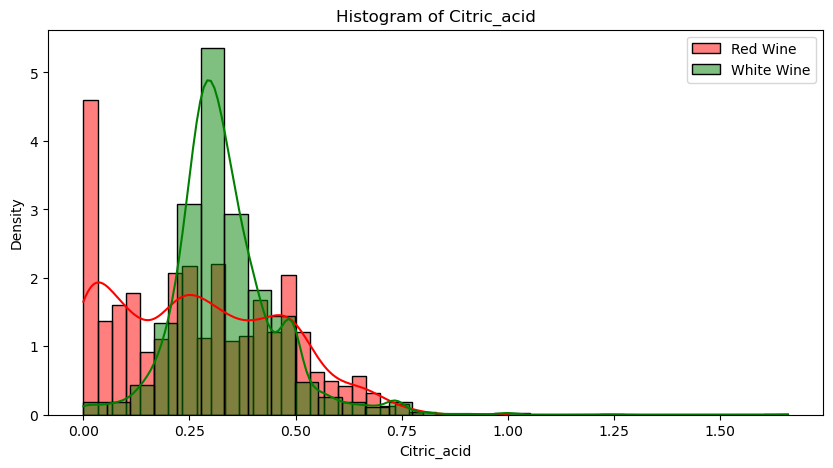


Red Wine - Citric_acid Statistics:
Mean: 0.271
Median: 0.260
Mode(s): [0.0]
Standard Deviation: 0.195
Variance: 0.038
Range: 1.000
Skewness: 0.318
Number of Outliers: 1
Outliers: [1.]

White Wine - Citric_acid Statistics:
Mean: 0.334
Median: 0.320
Mode(s): [0.3]
Standard Deviation: 0.121
Variance: 0.015
Range: 1.660
Skewness: 1.282
Number of Outliers: 270
Outliers: [0.62 0.04 0.59 0.07 0.03 0.61 0.62 0.63 0.61 0.62 0.63 0.66 0.66 0.
 0.04 0.67 0.67 0.04 0.04 0.07 0.88 0.08 0.59 0.07 0.07 0.07 0.07 0.58
 0.7  0.   0.   0.6  0.07 0.09 0.04 0.62 0.58 0.62 0.7  0.62 0.62 0.58
 0.02 0.65 0.65 0.71 0.66 0.66 0.07 0.06 0.07 0.06 0.68 0.68 0.68 0.68
 0.06 0.72 0.69 0.58 0.7  1.66 0.04 0.63 0.6  0.   0.08 0.58 0.58 0.05
 0.58 0.   0.   0.65 0.58 0.   0.05 0.05 0.62 0.62 0.58 0.58 1.   0.09
 0.01 0.71 0.71 0.6  0.06 0.74 0.81 0.69 0.58 0.69 0.   0.07 0.64 0.72
 0.73 0.65 0.68 0.65 0.74 0.71 0.59 0.68 0.08 0.72 0.64 0.02 0.74 0.74
 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74

In [36]:
# Analyzing the 'citric acid' variable
analyze_variable('citric_acid')

Red wine has just 1 outlier with a value of 1, while white wine has 270 outliers with values both high and low. The outlier of 1 is high for red wine, where citric acid levels tend to be lower. However, it might represent a genuine extreme due to the grape variety or fermentation process. So in this case, we will retain this outlier. For the white wines, extremely high values over 1.66 might be a measurement error, while the outliers around 0.7 to 1 may just be true extremes.   


Cohen's d for citric acid is -0.443 tells us that red wines have slightly lower citric acid levels.

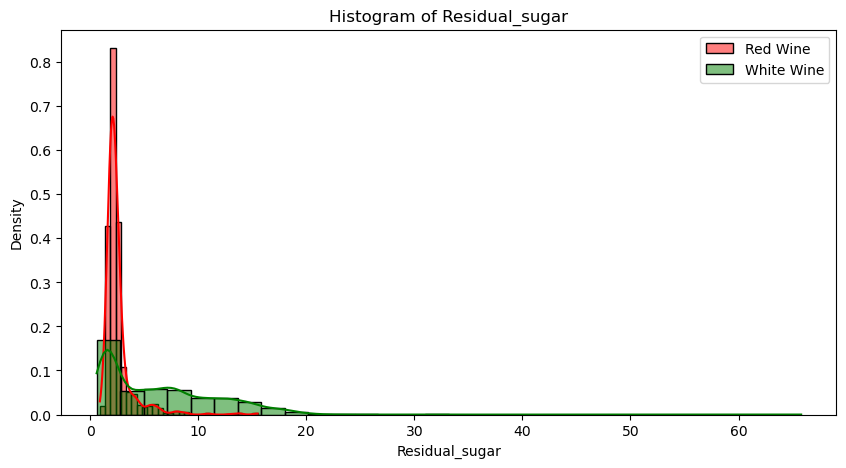


Red Wine - Residual_sugar Statistics:
Mean: 2.539
Median: 2.200
Mode(s): [2.0]
Standard Deviation: 1.410
Variance: 1.988
Range: 14.600
Skewness: 4.541
Number of Outliers: 155
Outliers: [ 6.1   6.1   3.8   3.9   4.4  10.7   5.5   5.9   5.9   3.8   5.1   4.65
  4.65  5.5   5.5   5.5   5.5   7.3   7.2   3.8   5.6   4.    4.    4.
  4.    7.    4.    4.    6.4   5.6   5.6  11.   11.    4.5   4.8   5.8
  5.8   3.8   4.4   6.2   4.2   7.9   7.9   3.7   4.5   6.7   6.6   3.7
  5.2  15.5   4.1   8.3   6.55  6.55  4.6   6.1   4.3   5.8   5.15  6.3
  4.2   4.2   4.6   4.2   4.6   4.3   4.3   7.9   4.6   5.1   5.6   5.6
  6.    8.6   7.5   4.4   4.25  6.    3.9   4.2   4.    4.    4.    6.6
  6.    6.    3.8   9.    4.6   8.8   8.8   5.    3.8   4.1   5.9   4.1
  6.2   8.9   4.    3.9   4.    8.1   8.1   6.4   6.4   8.3   8.3   4.7
  5.5   5.5   4.3   5.5   3.7   6.2   5.6   7.8   4.6   5.8   4.1  12.9
  4.3  13.4   4.8   6.3   4.5   4.5   4.3   4.3   3.9   3.8   5.4   3.8
  6.1   3.9   5.1   5.

In [38]:
# Analyzing the 'residudal sugar' variable
analyze_variable('residual_sugar')

For red wines, there are 155 outliers, which is not surprising since red wines tend to have lower residual sugar. Considering this, outliers between 4 and 8 may be considered true extremes that indicate genuine variations due to fermentation methods or sugar additions during the process. However, values beyond 15 are well above the average residual sugar for red wines and could be errors.

When it comes to white wines, the outliers around 20-30 could actually be wines with added sugar or naturally sweet wines (think dessert wines), so they should be retained as meaningful data points. However, we should consider removing the 65.8 value which is more unrealistic and could be a measurement error.  

The cohen's d of -0.864 tellsusthere isa moderate difference in residual sugar between red and white wines. White wines tend to have higher sugar levels.

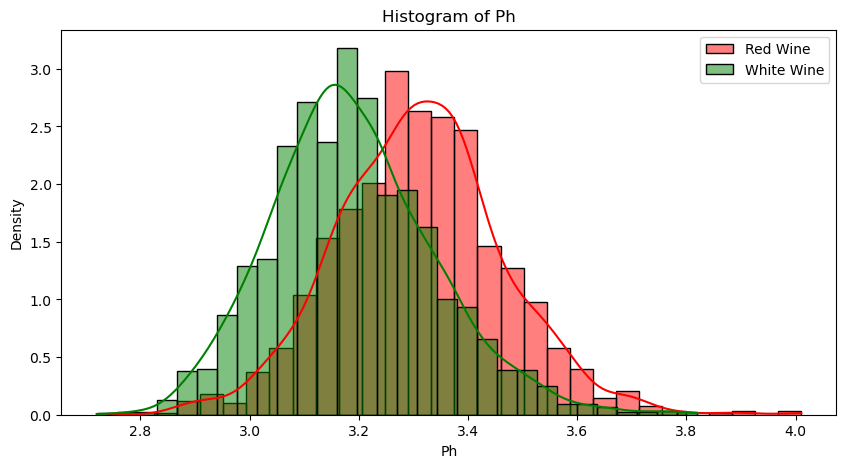


Red Wine - Ph Statistics:
Mean: 3.311
Median: 3.310
Mode(s): [3.3]
Standard Deviation: 0.154
Variance: 0.024
Range: 1.270
Skewness: 0.194
Number of Outliers: 35
Outliers: [3.9  3.75 3.85 2.74 3.69 3.69 2.88 2.86 3.74 2.92 2.92 2.92 3.72 2.87
 2.89 2.89 2.92 3.9  3.71 3.69 3.69 3.71 3.71 2.89 2.89 3.78 3.7  3.78
 4.01 2.9  4.01 3.71 2.88 3.72 3.72]

White Wine - Ph Statistics:
Mean: 3.188
Median: 3.180
Mode(s): [3.14]
Standard Deviation: 0.151
Variance: 0.023
Range: 1.100
Skewness: 0.458
Number of Outliers: 75
Outliers: [3.69 3.63 3.72 3.61 3.64 3.64 3.72 3.72 3.58 3.58 3.66 3.59 2.74 3.82
 3.81 3.65 3.65 3.59 3.77 3.62 3.63 3.58 3.58 3.65 3.74 2.8  3.6  3.6
 2.72 3.6  2.79 2.79 3.57 3.8  3.6  3.6  3.68 3.63 3.63 2.77 3.63 3.6
 3.6  3.61 3.61 3.59 3.79 3.59 3.68 3.59 3.66 3.7  3.74 3.8  3.57 3.57
 3.57 3.65 3.58 2.8  3.77 3.76 3.69 3.66 3.59 2.79 3.75 3.63 3.75 3.76
 3.66 3.66 2.8  3.67 3.57]

Cohen's d for Ph (Red vs. White): 0.809


In [40]:
# Analyzing the 'pH' variable
analyze_variable('pH')

When it comes to pH, we should consider removing extremely high and low values, such as outliers below 2.8 and outliers above 3.8. However, values that are more moderate should be retained for analysis since they could represent a natrual acidity difference that impacts flavor and stability.

Based on cohen's d, we know that red wines generally have higher pH levels.

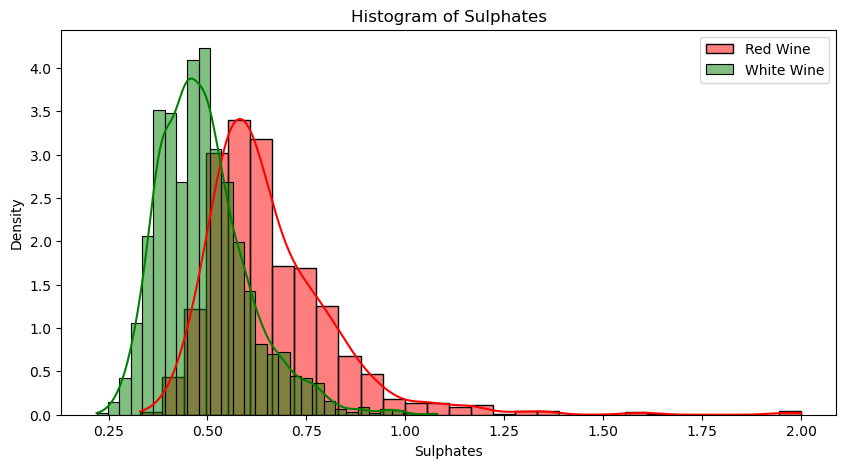


Red Wine - Sulphates Statistics:
Mean: 0.658
Median: 0.620
Mode(s): [0.6]
Standard Deviation: 0.170
Variance: 0.029
Range: 1.670
Skewness: 2.429
Number of Outliers: 59
Outliers: [1.56 1.28 1.08 1.2  1.12 1.28 1.14 1.95 1.22 1.95 1.98 1.31 2.   1.08
 1.59 1.02 1.03 1.61 1.09 1.26 1.08 1.   1.36 1.18 1.13 1.04 1.11 1.13
 1.07 1.06 1.06 1.05 1.06 1.04 1.05 1.02 1.14 1.02 1.36 1.36 1.05 1.17
 1.62 1.06 1.18 1.07 1.34 1.16 1.1  1.15 1.17 1.17 1.33 1.18 1.17 1.03
 1.17 1.1  1.01]

White Wine - Sulphates Statistics:
Mean: 0.490
Median: 0.470
Mode(s): [0.5]
Standard Deviation: 0.114
Variance: 0.013
Range: 0.860
Skewness: 0.977
Number of Outliers: 124
Outliers: [0.77 0.84 0.77 0.79 0.85 0.78 0.79 0.79 0.79 0.77 0.78 0.85 0.96 0.97
 0.82 0.82 0.77 0.95 0.95 0.77 0.95 0.82 0.82 0.9  0.88 0.88 0.79 0.8
 0.8  0.78 0.78 0.87 0.86 0.9  0.9  0.78 0.79 0.81 0.81 0.77 0.82 0.79
 0.79 0.77 0.82 0.92 0.79 0.79 0.82 0.82 0.82 0.82 0.82 0.79 0.78 0.79
 0.77 0.77 0.77 0.98 1.06 0.88 0.88 0.88 0.8  0.78 1.  

In [158]:
# Analyzing the 'sulphates' variable
analyze_variable('sulphates')

Sulphates are used as additives in wine and has various benefits, including preventing oxidation and bacterial growth, promoting the fermentation process and releasing desirable compounds from the grapes.

Based on the histogram and cohen's d, we know that red wine tends to have a higher level of sulphates compared to white wine.

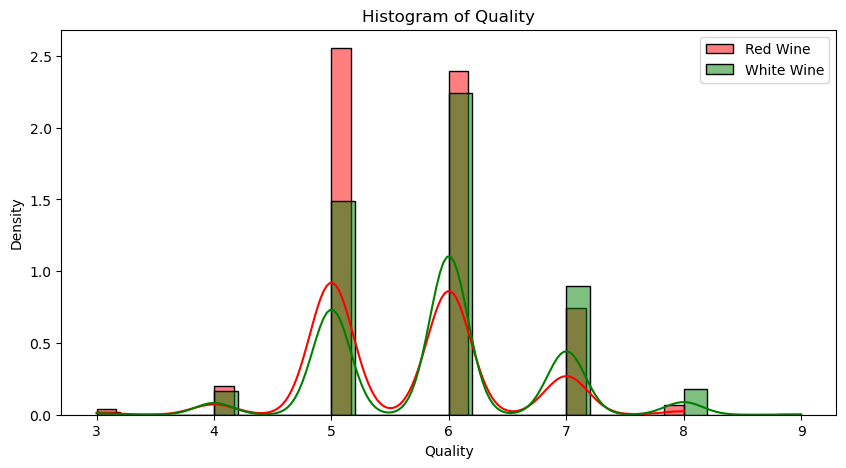


Red Wine - Quality Statistics:
Mean: 5.636
Median: 6.000
Mode(s): [5]
Standard Deviation: 0.808
Variance: 0.652
Range: 5.000
Skewness: 0.218
Number of Outliers: 28
Outliers: [8 8 8 8 8 3 8 8 8 3 8 3 8 3 3 8 8 8 8 8 3 3 8 8 3 3 3 8]

White Wine - Quality Statistics:
Mean: 5.878
Median: 6.000
Mode(s): [6]
Standard Deviation: 0.886
Variance: 0.784
Range: 6.000
Skewness: 0.156
Number of Outliers: 200
Outliers: [8 8 8 8 8 8 8 8 3 3 8 8 8 3 8 8 8 8 8 3 8 8 8 8 8 3 9 8 8 8 9 9 8 8 8 8 8
 8 8 8 8 3 9 8 8 8 8 8 3 8 8 8 8 8 8 8 8 8 8 8 3 8 8 8 8 8 8 8 8 8 8 8 8 8
 3 8 3 8 8 8 9 8 8 8 3 8 8 8 8 8 3 8 8 8 8 8 8 3 8 8 8 3 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 3 8 8 8 8 8 8 8 3 8 8
 8 3 8 8 8 3 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 3 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 3 8 8 8 8 8]

Cohen's d for Quality (Red vs. White): -0.279


In [167]:
# Analyzing the 'quality' variable
analyze_variable('quality')

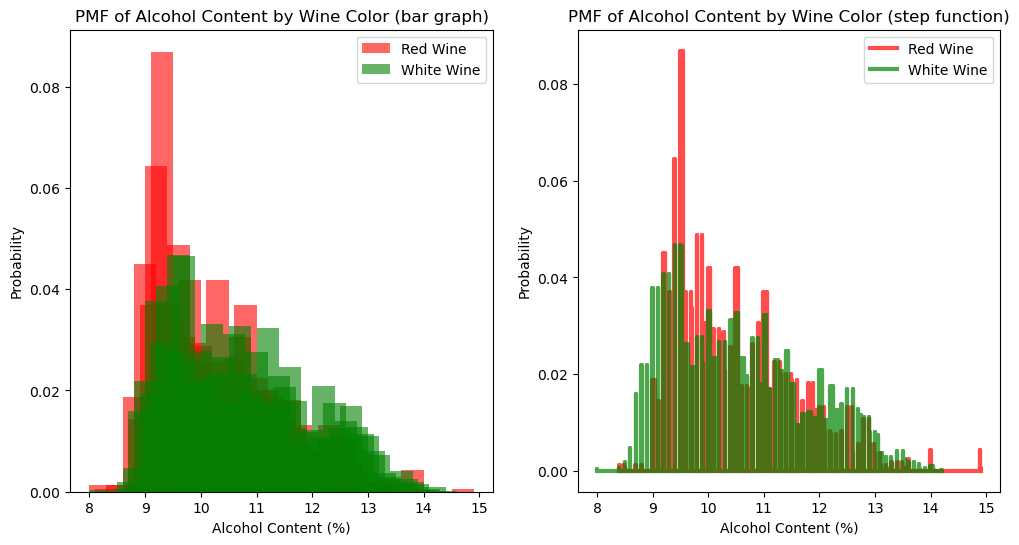

<Figure size 800x600 with 0 Axes>

In [66]:
import thinkstats2
import thinkplot


# Separate the alcohol content for red and white wines
red_wine_alcohol = complete_df[complete_df['color'] == 'red']['alcohol']
white_wine_alcohol = complete_df[complete_df['color'] == 'white']['alcohol']

# Create PMFs
red_pmf = thinkstats2.Pmf(red_wine_alcohol, label='Red Wine')
white_pmf = thinkstats2.Pmf(white_wine_alcohol, label='White Wine')

# Plot the PMFs as bar graphs
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(red_pmf, align='right', width=0.4, color = 'red')
thinkplot.Hist(white_pmf, align='left', width=0.4, color = 'green')
thinkplot.Config(xlabel='Alcohol Content (%)', ylabel='Probability', title='PMF of Alcohol Content by Wine Color (bar graph)')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmf(red_pmf, color='red', label='Red Wine')
thinkplot.Pmf(white_pmf, color='green', label='White Wine')
thinkplot.Show(xlabel='Alcohol Content (%)', ylabel='Probability', title='PMF of Alcohol Content by Wine Color (step function)')

The PMF indicates that red wines tend to have a lower alcohol content, with a peak between 9.5 to 10%. On the other hand, white wines have a broader distribution of alcohol content, with a peak around 10-11% and a more even spread up until about 13%. This suggests that winemaking practices for whites may involve more flexibility in alcohol levels. There is significant overlap in alcohol content between red and white wines, but white wines show more occurences of higher alcohol content from this dataset. 
When looking at the tails of the distribution, we can see higher alcohol percentages are more common in white wines, and red wines taper off earlier.

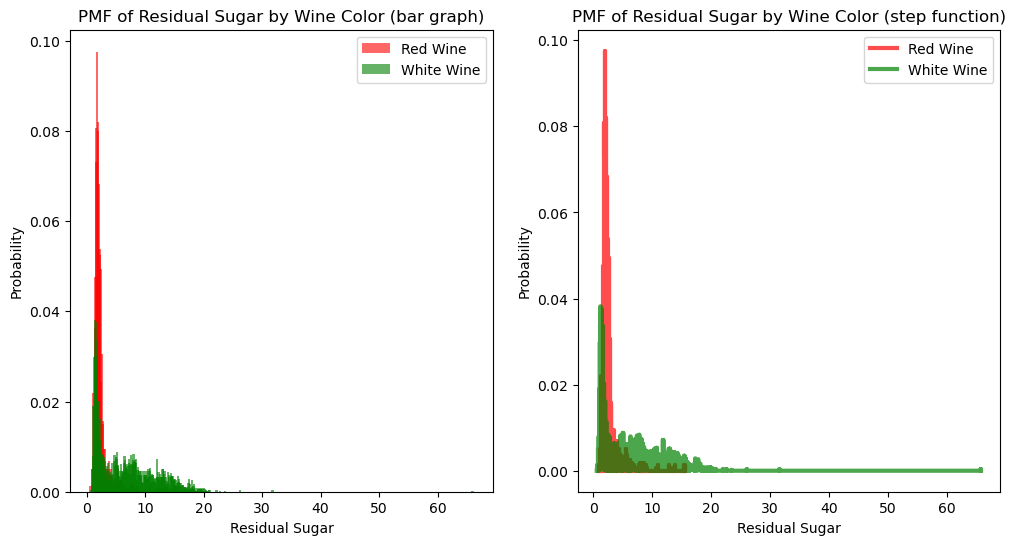

<Figure size 800x600 with 0 Axes>

In [72]:
# Separate the alcohol content for red and white wines
red_wine_sugar = complete_df[complete_df['color'] == 'red']['residual_sugar']
white_wine_sugar = complete_df[complete_df['color'] == 'white']['residual_sugar']

# Create PMFs
red_pmf = thinkstats2.Pmf(red_wine_sugar, label='Red Wine')
white_pmf = thinkstats2.Pmf(white_wine_sugar, label='White Wine')

# Plot the PMFs as bar graphs
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(red_pmf, align='right', width=0.4, color = 'red')
thinkplot.Hist(white_pmf, align='left', width=0.4, color = 'green')
thinkplot.Config(xlabel='Residual Sugar', ylabel='Probability', title='PMF of Residual Sugar by Wine Color (bar graph)')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmf(red_pmf, color='red', label='Red Wine')
thinkplot.Pmf(white_pmf, color='green', label='White Wine')
thinkplot.Show(xlabel='Residual Sugar', ylabel='Probability', title='PMF of Residual Sugar by Wine Color (step function)')

The long tail that can be seen for the white wines tell us that white wines have much higher residual sugar levels compared to red wines. Red wines rarely exceed 2 grams per liter of residual sugar, signifying a pattern of drier red wines. This difference is consistent with common wine knowledge, where white wines are often available in both dry and sweet, while red wines are usually made in drier varieties. 

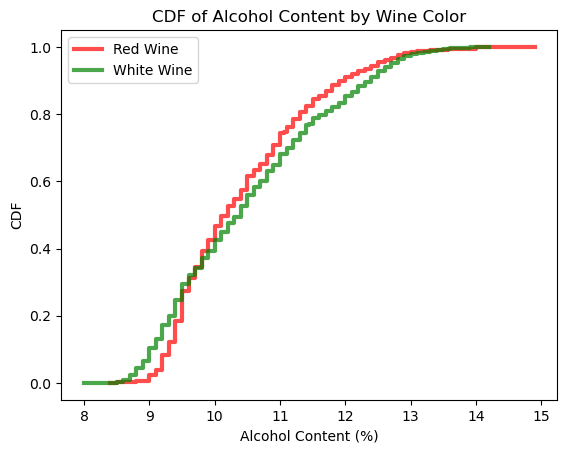

<Figure size 800x600 with 0 Axes>

In [69]:
# Create CDFs
red_cdf = thinkstats2.Cdf(red_wine_alcohol, label='Red Wine')
white_cdf = thinkstats2.Cdf(white_wine_alcohol, label='White Wine')

# Plot the CDFs
thinkplot.PrePlot(2)
thinkplot.Cdf(red_cdf, color='red')
thinkplot.Cdf(white_cdf, color='green')
thinkplot.Config(xlabel='Alcohol Content (%)', ylabel='CDF', title='CDF of Alcohol Content by Wine Color')
thinkplot.Show()

The CDF for white wine is shifted to the right of the CDF for red wines, specifically around the 9.5-12% range, suggesting that in general white wines tend to have slightly higher alcohol content compared to red wines. The median for red wine is around 10% and 10.5% for white, which also reinforces the first point. The CDF for red wine riese more quickly in the lower range, showing that more red wines are clustered around lower alcohol levels. The CDF for white wines have a more gradual increase, showing a borader distribution of alcoho content.

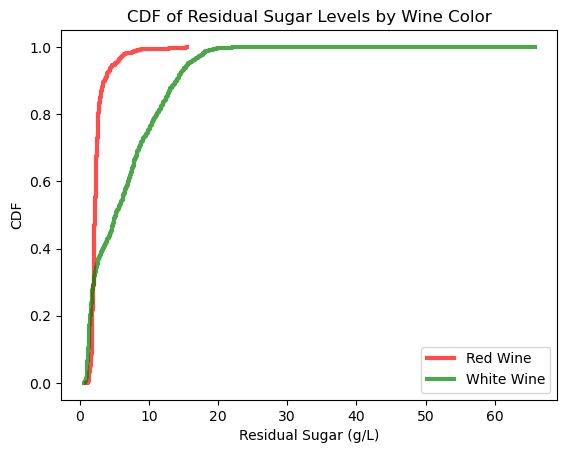

<Figure size 800x600 with 0 Axes>

In [78]:
# Create CDFs
red_cdf = thinkstats2.Cdf(red_wine_sugar, label='Red Wine')
white_cdf = thinkstats2.Cdf(white_wine_sugar, label='White Wine')

# Plot the CDFs
thinkplot.PrePlot(2)
thinkplot.Cdf(red_cdf, color='red')
thinkplot.Cdf(white_cdf, color='green')
thinkplot.Config(xlabel='Residual Sugar (g/L)', ylabel='CDF', title='CDF of Residual Sugar Levels by Wine Color')
thinkplot.Show()

The CDF for red wine increases rapidly and reaches 1.0 at around 5g per liter of residual sugar, showing that most red wines in the dataset have low residual sugar levels. The CDF for white wines rise a lot more gradually, with some wines having values as high as 60g/L. Residual sugar is a distinguishing factor between red and white wines, with whites having a higher potential for sweetness and much greater variability.

This normal probability plot shows us that white and red wines both have linear characteristics but it doesn't quite fit a normal distribution, specifically when looking at the tails. This is in line with the findings we had earlier where we saw a slight skew, implying that there may be a different model (lognormal?) that could be a better fit.

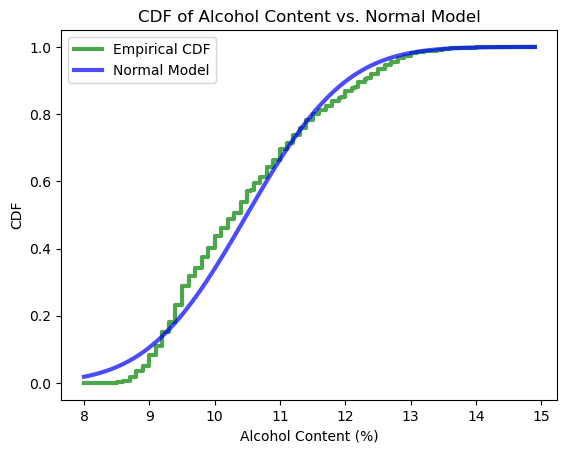

<Figure size 800x600 with 0 Axes>

In [115]:
# Data: Alcohol content for both wines
alcohol_content = complete_df['alcohol']

# Calculate mean and standard deviation
mean = alcohol_content.mean()
std_dev = alcohol_content.std()

# Generate empirical CDF for alcohol content
ecdf = thinkstats2.Cdf(alcohol_content, label='Empirical CDF')

# Generate values for the normal CDF based on the mean and standard deviation
x = np.linspace(alcohol_content.min(), alcohol_content.max(), 100)
normal_cdf = stats.norm.cdf(x, mean, std_dev)

# Plot the empirical CDF and the normal CDF
thinkplot.Cdf(ecdf, label='Empirical CDF', color='green')
thinkplot.Plot(x, normal_cdf, label='Normal Model', color='blue')
thinkplot.Config(xlabel='Alcohol Content (%)', ylabel='CDF', 
                 title='CDF of Alcohol Content vs. Normal Model')
thinkplot.Show()

The empirical CDF deviates from the model, specifically at both ends. The normal model overestimates the CDF for the lower alcohol content and underestimates it for the higher alcohol content. Overall, this normal model provides a rough approximation but doesn't capture the actual distribution perfectly.

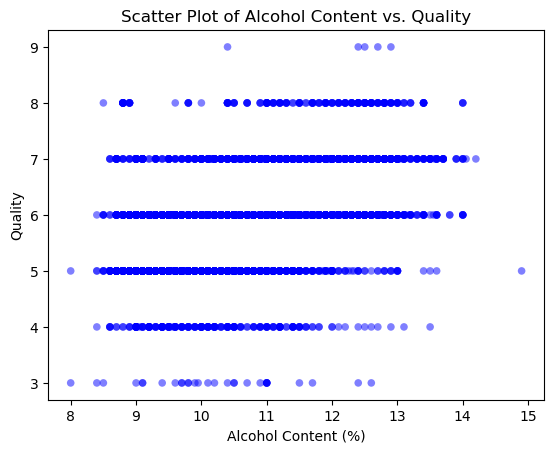

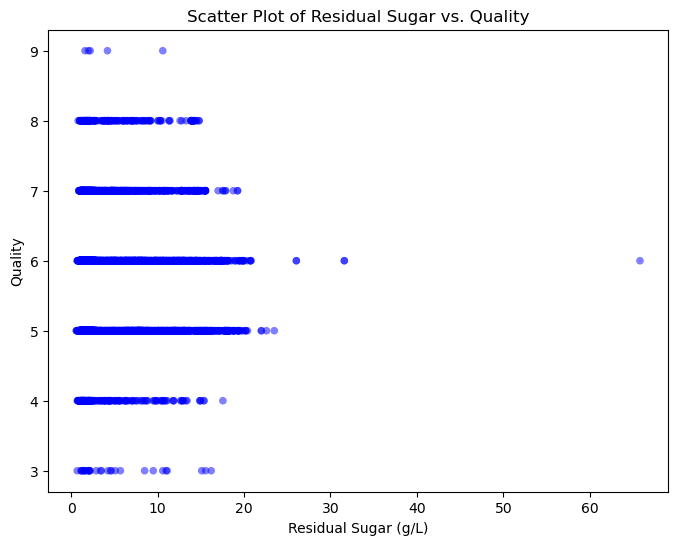

Alcohol vs. Quality
Covariance: 0.46
Pearson’s Correlation: 0.44

Residual Sugar vs. Quality
Covariance: -0.15
Pearson’s Correlation: -0.04


<Figure size 800x600 with 0 Axes>

In [120]:
# Data: Define variables for alcohol vs quality and residual sugar vs quality
alcohol = complete_df['alcohol']
quality = complete_df['quality']
residual_sugar = complete_df['residual_sugar']

# Scatter Plot 1: Alcohol Content vs. Quality
thinkplot.Scatter(alcohol, quality, alpha=0.5)
thinkplot.Config(xlabel="Alcohol Content (%)", ylabel="Quality", 
                 title="Scatter Plot of Alcohol Content vs. Quality")
thinkplot.Show()

# Scatter Plot 2: Residual Sugar vs. Quality
thinkplot.Scatter(residual_sugar, quality, alpha=0.5)
thinkplot.Config(xlabel="Residual Sugar (g/L)", ylabel="Quality", 
                 title="Scatter Plot of Residual Sugar vs. Quality")
thinkplot.Show()

# Calculate Covariance and Pearson’s Correlation for both pairs
# Pair 1: Alcohol Content vs. Quality
cov_alcohol_quality = np.cov(alcohol, quality)[0, 1]
pearson_alcohol_quality = stats.pearsonr(alcohol, quality)[0]

# Pair 2: Residual Sugar vs. Quality
cov_sugar_quality = np.cov(residual_sugar, quality)[0, 1]
pearson_sugar_quality = stats.pearsonr(residual_sugar, quality)[0]

print("Alcohol vs. Quality")
print(f"Covariance: {cov_alcohol_quality:.2f}")
print(f"Pearson’s Correlation: {pearson_alcohol_quality:.2f}")

print("\nResidual Sugar vs. Quality")
print(f"Covariance: {cov_sugar_quality:.2f}")
print(f"Pearson’s Correlation: {pearson_sugar_quality:.2f}")

Alcohol vs. Quality: The scatter plot points are fairly disperesed but has a slight upward trend toward the right side, indicating that wines with higher alcohol content may be associated with higher quality scores. However, it is not a strong relationship. The positive covariance of 0.46 means that as alcohol content increases, quality does too. However, this alone doesn't tell us the strength or consistency of the relationship. Pearson's correlation of 0.44 suggests a moderate positive, linear relationship between alcohol content and quality. It is still not very strong and implies there may be other factors that influence quality.  

Residual Sugar vs. Quality: The scatter plot does not show us a clear trend and the scores are spread out across residual sugar levels. The negative covariance is very low, indicating a very minimal association between residual sugar and quality. Furthermore, Pearson's Correlation of -0.04 is close to 0, suggesting no linear relationship between these variables. 


In [143]:
# Define the threshold for high and low alcohol (e.g., median split)
median_alcohol = complete_df['alcohol'].median()
high_alcohol_group = complete_df[complete_df['alcohol'] >= median_alcohol]['quality']
low_alcohol_group = complete_df[complete_df['alcohol'] < median_alcohol]['quality']


class DiffMeansPermute(thinkstats2.HypothesisTest):
    
    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))
        
    
    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

# Use DiffMeansPermute to perform the permutation test and get the p-value
data = (high_alcohol_group, low_alcohol_group)
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters=1000)  # Run 1000 permutations


# Print the observed difference and p-value
print(f"Observed Difference in Mean Quality: {observed_diff:.2f}")
print(f"p-value: {p_value:.4f}")

Observed Difference in Mean Quality: 0.67
p-value: 0.0000


Wines with higher alcohol content have a quality rating that is 0.67 points higher than wines with lower alcohol content. The p-value of 0.0000 is suggesting a very strong statistical significance. There is a very low probability that the observed difference of 0.67 is due to random chance.

In [151]:
# Start with a single-variable regression of quality vs alcohol content

import statsmodels.formula.api as smf

# Single-variable linear regression with Quality as the dependent variable and Alcohol as the explanatory variable
model_single = smf.ols(formula='quality ~ alcohol', data=complete_df).fit()

# Print the summary of the single-variable regression model
print(model_single.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1598.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          1.50e-312
Time:                        19:53:17   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6495   BIC:                         1.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4053      0.086     27.988      0.0

R-squared of 0.197 tells us that 19.7% of the variability in wine quality can be explained by the alcohol content. This indicates that alcohol content is a strong predictor of quality. Furthermore, the coefficient for alcohol tells us that for every 1% increase in alcohol content, we can expect the quality rating to increase by 0.33 points. This relationship is statistically signficant with a p-value of less than 0.05. 

In [173]:
# Multiple-Variable Regression of Quality vs other variables

# Including Alcohol, Residual Sugar, pH, and Sulphates as explanatory variables
model_multiple = smf.ols(formula='quality ~ alcohol + residual_sugar + pH + fixed_acidity + sulphates', data=complete_df).fit()

# Print the summary of the multiple-variable regression model
print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     368.7
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:38:34   Log-Likelihood:                -7525.8
No. Observations:                6497   AIC:                         1.506e+04
Df Residuals:                    6491   BIC:                         1.510e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3639      0.261      9.

The R-squared of 0.221 tells us that 22.1% of the variability in wine quality can by explained by the combination of alcohol content, fixed acidity, residual sugar, pH, and sulphates. This is a moderate level of explanatory power, suggesting that other factors could also contribute to wine quality. The coefficient for alcohol is 0.3628, which tell us that for every 1% increase in alcohol content, the quality increases by about 0.36 points. The next significant variable is sulphates, with a coefficient of 0.5089, and a p-value that indicates this is statistically significant.

Alcohol and sulphates are the strongest predictors of wine quality based on our multiple regression model. Residual sugar shows a small impact, and pH does not show a statistically significant relationship.